## 라이브러리 임포트

In [1]:
import numpy as np
import pandas as pd

#xgboost 알고리즘 사용
import xgboost as xgb

#훈련,테스트 모델 나누기 위해 사용 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#시각화
import seaborn as sns
import matplotlib.pyplot as plt

#의사 결정 트리 시각화
%matplotlib inline
from xgboost import plot_tree
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

#shap
import shap

### 데이터로드

In [2]:
datasets = pd.read_csv('C:/Users/jihun/Heart_Disease/XAI/heart.csv')

### 데이터 특성 정보 
- Age : 나이 
- Sex : 성별 (남자,여자)
- ChestPainType : 가슴통증유형
- RestingBP : 휴식 혈압
- Cholesterol : 콜레스테롤
- FastingBS : 공복 상태의 혈당
- RestingECG : 안정된 상태의 심전도 결과 
- MaxHR : 달성한 최대 심박수
- ExerciseAngina : 운동으로 발생된 협심증
- Oldpeak : 운동으로 발생하는 ST분절 저하
- ST_Slope : ST분절 기울기 
- HeartDisease : 심장병 진단(0:정상, 1:심장질환환자)

- TA : Typical Angina 전형적인 가슴통증
- ATA : Atypical Angina 비정형적인 가슴통증
- NAP : Non-Anginal Pain  비심인성 가슴통증
- ASY : Asymptonic 무증상 
- FastingBS : 공복상태혈당 참 > 120mg/dl, 거짓 < 120mg/dl

- 

### 데이터 정보

In [3]:
# 결측값이 있는지 확인(개수)
datasets.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
datasets.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
datasets.shape

(918, 12)

In [6]:
datasets['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [7]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## 데이터 탐색 및 EDA

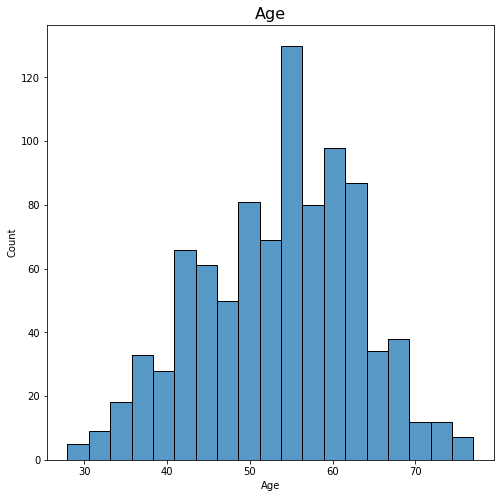

In [8]:
# 나이 
plt.figure(figsize=(8,8))
sns.histplot(x=datasets['Age'])
plt.title('Age', fontsize=16)
plt.show()
#50대~60대초반까지의 분포가 높음.

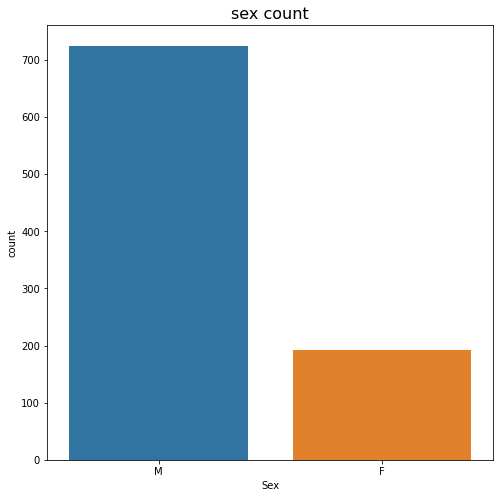

In [9]:
#성별 
#남자가 여자보다 월등히 많음
plt.figure(figsize=(8,8))
sns.countplot(data=datasets, x='Sex')
plt.title('sex count', fontsize=16)
plt.show()

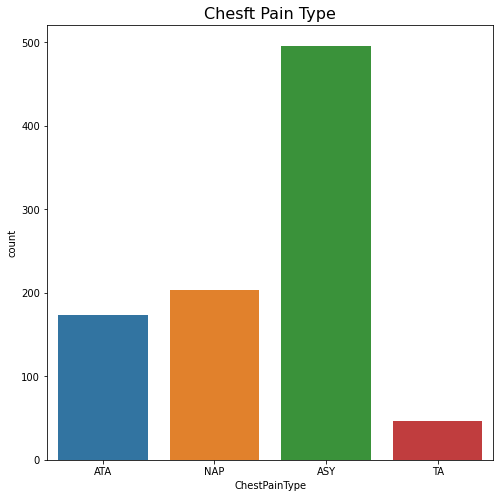

In [10]:
# Chest Pain Type
# 4개의 유형간 균형이 맞지않음. (TA정도의 경우 현저히 낮음)
plt.figure(figsize=(8,8))
sns.countplot(x=datasets['ChestPainType'])
plt.title('Chesft Pain Type',fontsize=16)
plt.show()

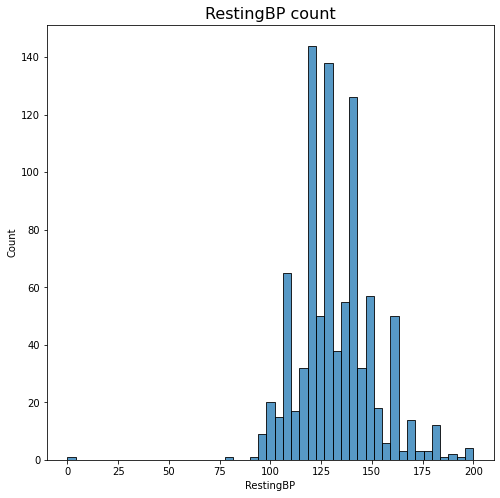

In [11]:
# RestingBP 
plt.figure(figsize=(8,8))
sns.histplot(x=datasets['RestingBP'])
plt.title('RestingBP count', fontsize=16)
plt.show()

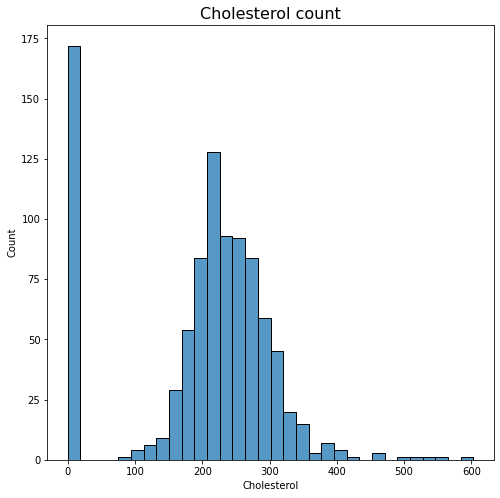

In [12]:
# Cholesterol 
plt.figure(figsize=(8,8))
sns.histplot(x=datasets['Cholesterol'])
plt.title('Cholesterol count', fontsize=16)
plt.show()

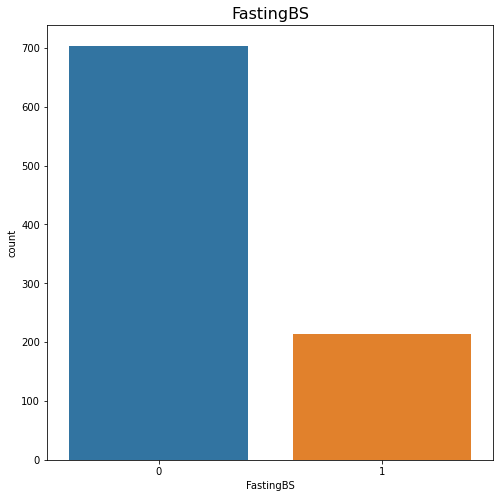

In [13]:
# Fasting Blood sugar
plt.figure(figsize=(8,8))
sns.countplot(x=datasets['FastingBS'])
plt.title('FastingBS', fontsize=16)
plt.show()

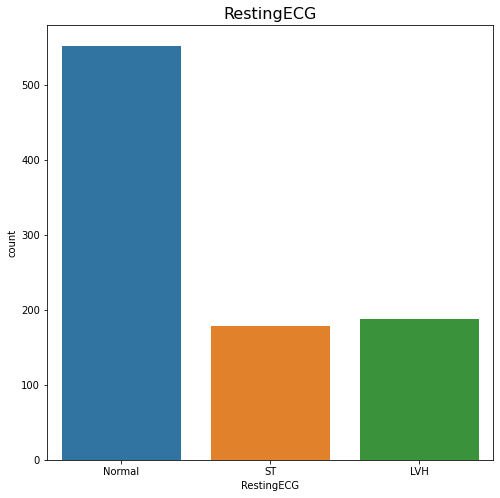

In [14]:
# Resting ECG
plt.figure(figsize=(8,8))
sns.countplot(x=datasets['RestingECG'])
plt.title('RestingECG', fontsize=16)
plt.show()

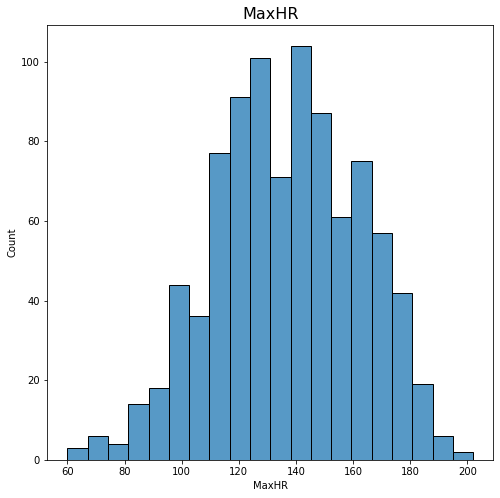

In [15]:
#MaxHR
# Cholesterol 
plt.figure(figsize=(8,8))
sns.histplot(x=datasets['MaxHR'])
plt.title('MaxHR', fontsize=16)
plt.show()


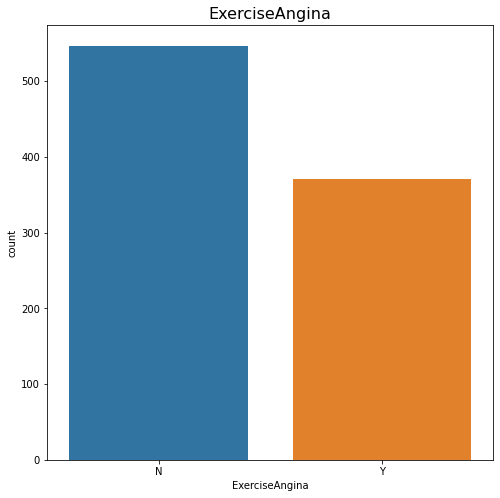

In [16]:
# ExerciseAngina
plt.figure(figsize=(8,8))
sns.countplot(x=datasets['ExerciseAngina'])
plt.title('ExerciseAngina', fontsize=16)
plt.show()

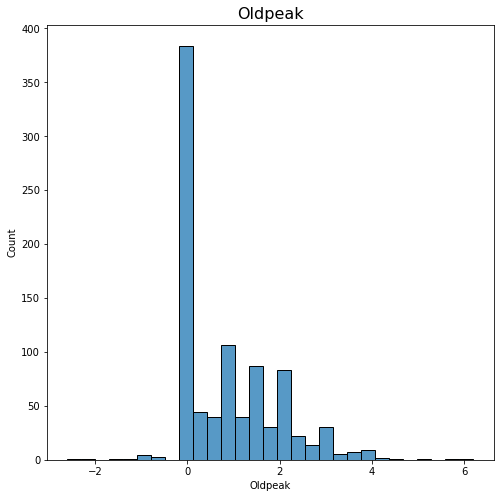

In [17]:
# oldpeak
plt.figure(figsize=(8,8))
sns.histplot(x=datasets['Oldpeak'])
plt.title('Oldpeak', fontsize=16)
plt.show()

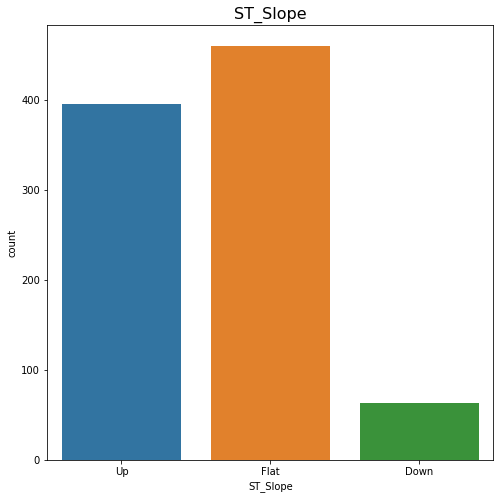

In [18]:
# ST_Slope
plt.figure(figsize=(8,8))
sns.countplot(x=datasets['ST_Slope'])
plt.title('ST_Slope', fontsize=16)
plt.show()

## 심장병과 관계 확인

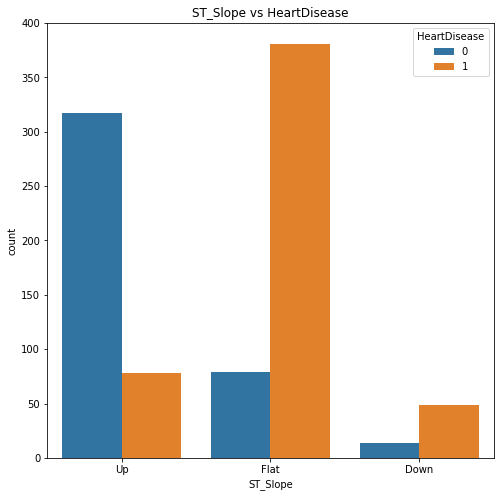

In [19]:
# Slope와 심장병의 관계
plt.figure(figsize=(8,8))
plt.title("ST_Slope vs HeartDisease")
sns.countplot(data=datasets, x='ST_Slope', hue='HeartDisease')
plt.show()

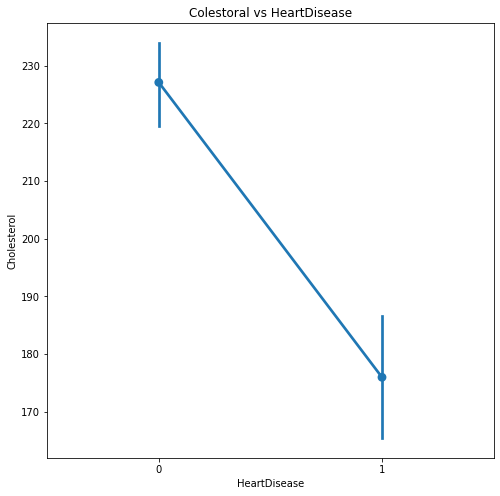

In [20]:
#콜레스테롤 vs 심장병 
plt.figure(figsize=(8,8))
plt.title("Colestoral vs HeartDisease")
sns.pointplot(data=datasets, x='HeartDisease', y='Cholesterol')
plt.show()

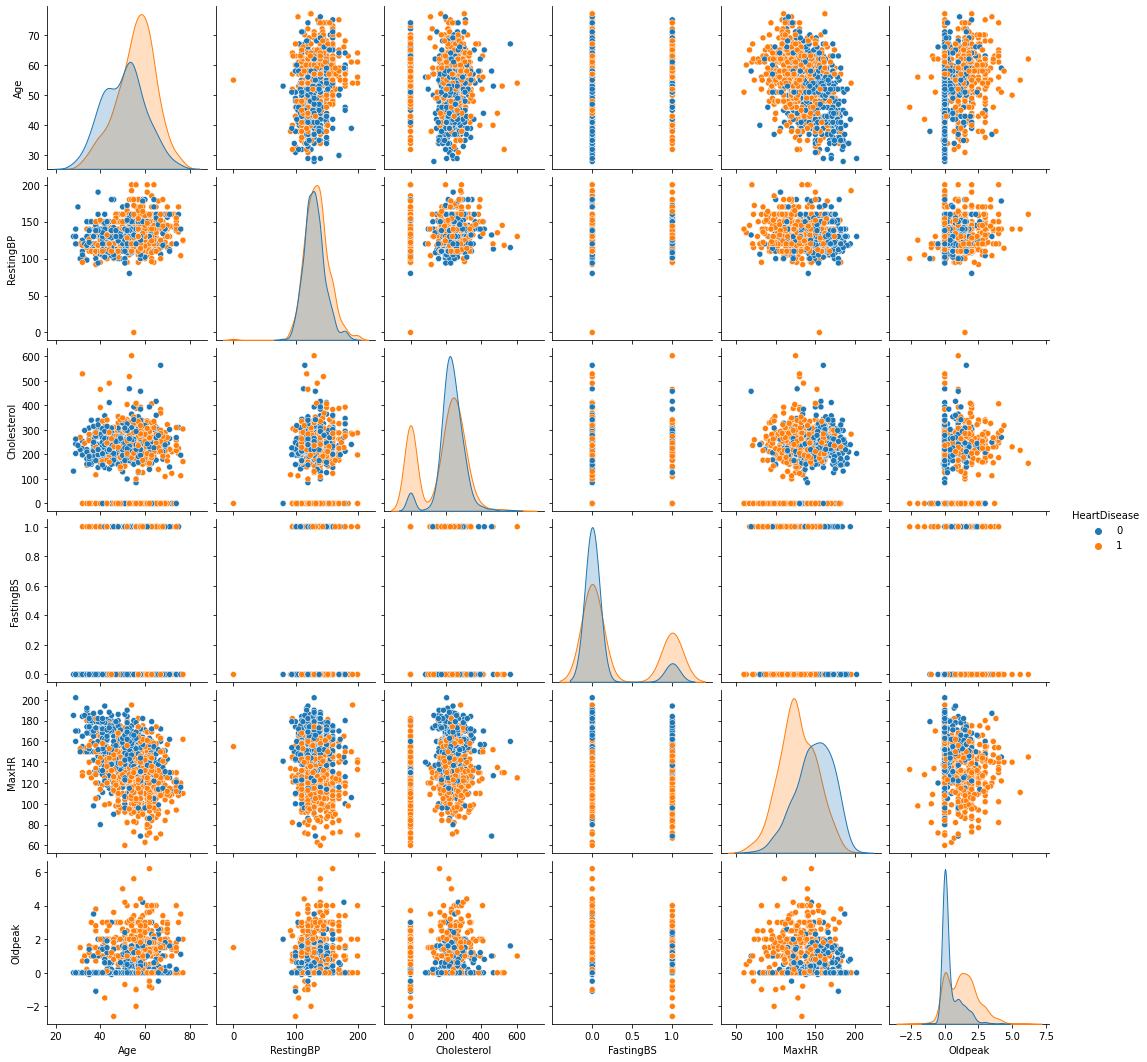

In [21]:
sns.pairplot(datasets,hue = 'HeartDisease')

In [22]:
datasets

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## 데이터 전처리

In [23]:
#ExerciseAngina의 Y,N 내용을 True와 False로 변환
#걸렸는지 안걸렸는지의 여부를 True False로 판별 가능 
datasets.ExerciseAngina = datasets.ExerciseAngina=='Y'
#datasets.ExerciseAngina

In [24]:
# 열이름을 남성으로 바꿔 True면 남성 False면 여성으로 구분할 수 있게 전처리
datasets.Sex = datasets.Sex =='M'
datasets.rename(columns = {'Sex':'Male'}, inplace = True)

In [25]:
#범주형의 대해서  , 가변수처리 
# ChestpainType과 RestingECG, ST_Slope의 범주형 컬럼들을 가변수처리을 통해 전처리
#drop_first=Ture의 값으로 나머지 컬럼 값을보고 남은 한개의 컬럼 값을 추측할 수 있어서 삭제해주기
datasets = pd.get_dummies(datasets)

In [26]:
len(datasets.columns)     

19

In [27]:
datasets

,Age,Male,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,True,140,289,0,172,False,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,False,160,180,0,156,False,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,True,130,283,0,98,False,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,False,138,214,0,108,True,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,True,150,195,0,122,False,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,True,110,264,0,132,False,1.2,1,0,0,0,1,0,1,0,0,1,0
914,68,True,144,193,1,141,False,3.4,1,1,0,0,0,0,1,0,0,1,0
915,57,True,130,131,0,115,True,1.2,1,1,0,0,0,0,1,0,0,1,0
916,57,False,130,236,0,174,False,0.0,1,0,1,0,0,1,0,0,0,1,0


In [28]:
#target과 상관관계 확인
datasets.corr().HeartDisease.sort_values(ascending = False)

HeartDisease         1.000000
ST_Slope_Flat        0.554134
ChestPainType_ASY    0.516716
ExerciseAngina       0.494282
Oldpeak              0.403951
Male                 0.305445
Age                  0.282039
FastingBS            0.267291
ST_Slope_Down        0.122527
RestingBP            0.107589
RestingECG_ST        0.102527
RestingECG_LVH       0.010670
ChestPainType_TA    -0.054790
RestingECG_Normal   -0.091580
ChestPainType_NAP   -0.212964
Cholesterol         -0.232741
MaxHR               -0.400421
ChestPainType_ATA   -0.401924
ST_Slope_Up         -0.622164
Name: HeartDisease, dtype: float64

In [29]:
#양의 상관관계에서 가장 낮은 ResingBP, RestingECG_ST
#음의 상관관계에서 가장 낮은 ChestPainType_TA, RestingECG_Normal
datasets = datasets.drop(columns = ['RestingECG_LVH','ChestPainType_TA','RestingECG_Normal','RestingECG_ST','RestingBP'])

In [30]:
datasets.shape

(918, 14)

In [31]:
datasets.head()

,Age,Male,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,True,289,0,172,False,0.0,0,0,1,0,0,0,1
1,49,False,180,0,156,False,1.0,1,0,0,1,0,1,0
2,37,True,283,0,98,False,0.0,0,0,1,0,0,0,1
3,48,False,214,0,108,True,1.5,1,1,0,0,0,1,0
4,54,True,195,0,122,False,0.0,0,0,0,1,0,0,1


## 모델링

In [32]:
#훈련, 테스트 데이터설정 
X=datasets.drop(columns = 'HeartDisease')
y = datasets['HeartDisease']

#모델구축, 훈련
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier()
model.fit(x_train,y_train)

#예측
y_pred = model.predict(x_test)
prediction = [round(value) for value in y_pred]

#정확도
accuracy = accuracy_score(y_test, prediction)
print('Accuracy : %.2f%%' % (accuracy*100))

Accuracy : 86.96%


# 샘플링

In [33]:
#SMOTE사용
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(x_train,y_train)

#x_train
print("SMOTE 적용 전 학습용 훈련데이터세트 :", x_train.shape)
print("SMOTE 적용 후 학습용 훈련데이터세트 :", X_train_over.shape)

#y_train
print("\nSMOTE 적용 전 학습용 검증데이터세트 1값 :", (sum(y_train==1)))
print("SMOTE 적용 전 학습용 검증데이터세트 0값 :", (sum(y_train==0)))


print("\nSMOTE 적용 후 학습용 검증데이터세트 1값 :", (sum(y_train_over==1)))
print("SMOTE 적용 후 학습용 검증데이터세트 0값 :", (sum(y_train_over==0)))



SMOTE 적용 전 학습용 훈련데이터세트 : (734, 13)
SMOTE 적용 후 학습용 훈련데이터세트 : (802, 13)

SMOTE 적용 전 학습용 검증데이터세트 1값 : 401
SMOTE 적용 전 학습용 검증데이터세트 0값 : 333

SMOTE 적용 후 학습용 검증데이터세트 1값 : 401
SMOTE 적용 후 학습용 검증데이터세트 0값 : 401


In [34]:
#샘플링 한 후 적용 
model.fit(X_train_over,y_train_over)

#예측
y_pred = model.predict(x_test)
prediction = [round(value) for value in y_pred]

#정확도
accuracy = accuracy_score(y_test, prediction)
print('Accuracy : %.2f%%' % (accuracy*100))

Accuracy : 88.04%


# 교차검증으로 모델의 성능평가

In [35]:
from sklearn.model_selection import KFold

#, shuffle=True
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy=[]
features =x_train
n_iter=0 # 교차검증횟수


for train_index, test_index in kfold.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    #학습 및 예측
    model.fit(X_train,Y_train)
    pred = model.predict(X_test)
    n_iter += 1
    
    # 반복 시 마다 정확도 측정
    k_accuracy = np.round(accuracy_score(Y_test, pred), 4)
    print('검증 정확도 : ', k_accuracy)
    cv_accuracy.append(k_accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('평균 검증 정확도 : ', (np.mean(cv_accuracy)))


검증 정확도 :  0.9184
검증 정확도 :  0.8163
검증 정확도 :  0.8435
검증 정확도 :  0.8639
검증 정확도 :  0.8425
평균 검증 정확도 :  0.85692


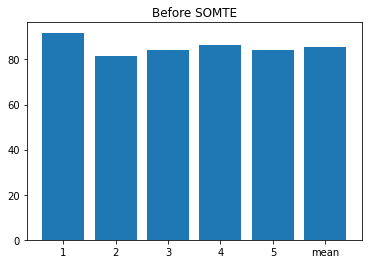

In [36]:
bar1 = np.arange(6)
C = ['1', '2', '3', '4', '5', 'mean']
D = [91.84,81.63,84.35,86.39,84.25, 85.692]
colors = ['dodgerblue','dodgerblue','dodgerblue','dodgerblue','dodgerblue','C2']
plt.bar(bar1, D)
plt.xticks(bar1, C)
plt.title('Before SOMTE')
plt.show()

In [37]:
from sklearn.model_selection import KFold

#, shuffle=True
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = []
features_over = X_train_over
n_iter=0 # 교차검증횟수


for train_index, test_index in kfold.split(features_over):
    X_train, X_test = features_over.iloc[train_index], features_over.iloc[test_index]
    Y_train, Y_test = y_train_over.iloc[train_index], y_train_over.iloc[test_index]
    
    #학습 및 예측
    model.fit(X_train,Y_train)
    pred = model.predict(X_test)
    n_iter += 1
    
    # 반복 시 마다 정확도 측정
    k_accuracy = np.round(accuracy_score(Y_test, pred), 4)
    print('검증 정확도 : ', k_accuracy*100.0)
    cv_accuracy.append(k_accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('평균 검증 정확도 : ', (np.mean(cv_accuracy*100)))



검증 정확도 :  89.44
검증 정확도 :  88.82
검증 정확도 :  87.5
검증 정확도 :  85.61999999999999
검증 정확도 :  86.25
평균 검증 정확도 :  0.8752599999999999


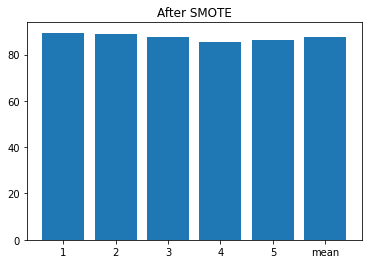

In [38]:
bar = np.arange(6)
A = ['1', '2', '3', '4', '5', 'mean']
B = [89.44,88.82,87.5,85.62,86.25, 87.525]
colors = ['dodgerblue','dodgerblue','dodgerblue','dodgerblue','dodgerblue','C2']
plt.bar(bar, B)
plt.xticks(bar, A)
plt.title('After SMOTE')
plt.show()

# XAI접목 - Shap

In [39]:
#JS 시각화 라이브러리 로드
#explainer, shap_values 선정
# shap에는 Kernel, Deep, Tree 3개가 있는데 우리가 사용한 모델에서는
# 피처의 특징이 많을 뿐더러 전체적인 새플리값을 계산해야하기때문에 
# Treeshap이 적절하다 

shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_over)

In [40]:
len(shap_values)

802

In [41]:
explainer

In [42]:
Person1 = 121
Person2 = 790

In [43]:
#훈련된 데이터의 121번째 환자에 대한 데이터 
shap.force_plot(explainer.expected_value, shap_values[Person1,:],X_train_over.iloc[Person1,:])


- 첫 번째 데이터에 대한 구체적 SHAP 값 시각화
- force_plot - 학습용 데이터의 특정 데이터 하나에 대한 섀플리 값을 1차원 평면에 정렬
- 121번째의 데이터에 대한 섀플리 값은 2.8로 추정이되며
- 심장병예측에 가장 큰 기여(영향)을 준 요소는 ST_Slope_Flat(ST분절기울기 평평)
- 심장병 예측에 부정적인영향(정상이라고판단하는) 준 요소는 가슴통증이 무증상인요소
- 두번째로 가장 크게 작용한 요소는 콜레스테롤이며 수치는 337이다/
- 특정데이터 하나의 섀플리 영향력을 직관적으로 파악할 수 있다.

In [44]:
X_train_over.iloc[121]

Age                    61
Male                 True
Cholesterol           337
FastingBS               0
MaxHR                  98
ExerciseAngina       True
Oldpeak                 0
ChestPainType_ASY       0
ChestPainType_ATA       0
ChestPainType_NAP       1
ST_Slope_Down           0
ST_Slope_Flat           1
ST_Slope_Up             0
Name: 121, dtype: object

Text(0, 0.5, 'HeartDisease')

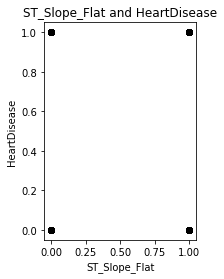

In [45]:
idx = 121

plt.subplot(1,2,1)
plt.scatter(X['ST_Slope_Flat'], y, color='black', alpha=0.6)
plt.title('ST_Slope_Flat and HeartDisease')
plt.xlabel('ST_Slope_Flat')
plt.ylabel('HeartDisease')


Text(0, 0.5, 'HeartDisease of Person1')

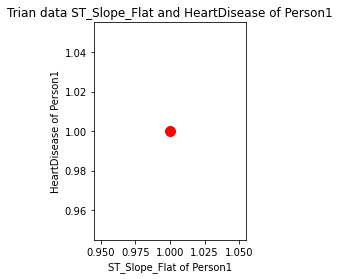

In [46]:
plt.subplot(1,2,2)
plt.title('Trian data ST_Slope_Flat and HeartDisease of Person1')
plt.scatter(X_train_over['ST_Slope_Flat'].iloc[Person1], y_train_over[idx], c='red', s=100)
plt.xlabel('ST_Slope_Flat of Person1')
plt.ylabel('HeartDisease of Person1')


(-0.25, 1.25)

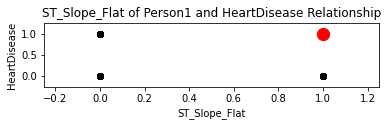

In [47]:
plt.subplot(3,1,3)
plt.title('ST_Slope_Flat of Person1 and HeartDisease Relationship')
plt.scatter(X['ST_Slope_Flat'], y, color='black', alpha=0.6)
plt.scatter(X_train_over['ST_Slope_Flat'].iloc[Person1], y_train_over[Person1], c='red', s=150)
plt.xlabel('ST_Slope_Flat')
plt.ylabel('HeartDisease')
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)

In [48]:

shap.force_plot(explainer.expected_value,shap_values[Person2,:],X_train_over.iloc[Person2,:])


- 알수있는사실
- 섀플리 값이 환자에대해 -4.72로 추정이되며 
- 심장병 예측에 가장 큰 부정적영향(정상이라고 판단하게되는)을 준 요소는 ST_Slope_Flat특징이다.
- 예측 모델은 이 환자가 정상적이다 라고 예측하였는데 가장 큰 기여를 한 피처의 순서는
- ST_Slope_Flat(ST분절기울기가 0이아니고), 나이가 40살이며, ST분절의 기울기가 상승을 띄고있었다. 가슴통증유형도 무증상이 아닌 것을 알수있다.

In [49]:
X_train_over.iloc[Person2]

Age                     40
Male                  True
Cholesterol            273
FastingBS                0
MaxHR                  109
ExerciseAngina       False
Oldpeak                  0
ChestPainType_ASY        0
ChestPainType_ATA        1
ChestPainType_NAP        0
ST_Slope_Down            0
ST_Slope_Flat            0
ST_Slope_Up              1
Name: 790, dtype: object

Text(0, 0.5, 'HeartDisease')

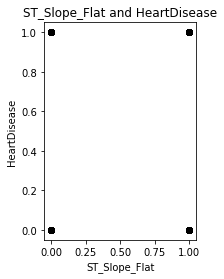

In [50]:
idx_2 = 790

plt.subplot(1,2,1)
plt.scatter(X['ST_Slope_Flat'], y, color='black', alpha=0.6)
plt.title('ST_Slope_Flat and HeartDisease')
plt.xlabel('ST_Slope_Flat')
plt.ylabel('HeartDisease')


Text(0, 0.5, 'HeartDisease of Person2')

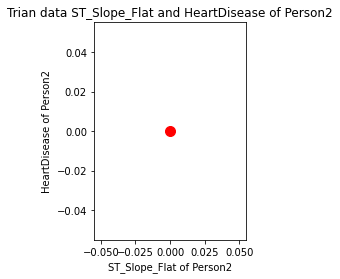

In [51]:
plt.subplot(1,2,2)
plt.title('Trian data ST_Slope_Flat and HeartDisease of Person2')
plt.scatter(X_train_over['ST_Slope_Flat'].iloc[Person2], y_train_over[Person2], c='red', s=100)
plt.xlabel('ST_Slope_Flat of Person2')
plt.ylabel('HeartDisease of Person2')


(-0.25, 1.25)

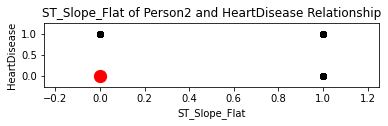

In [52]:
plt.subplot(3,1,3)
plt.title('ST_Slope_Flat of Person2 and HeartDisease Relationship')
plt.scatter(X['ST_Slope_Flat'], y, color='black', alpha=0.6)
plt.scatter(X_train_over['ST_Slope_Flat'].iloc[idx_2], y_train_over[idx_2], c='red', s=150)
plt.xlabel('ST_Slope_Flat')
plt.ylabel('HeartDisease')
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)

### - 특정 데이터 해석 :예측 값에 긍정적 요인은 빨간색, 부정적 요인은 파란색으로 표현합니다. Bar의 크기가 큰 것이 큰 영향을 준 요인입니다.



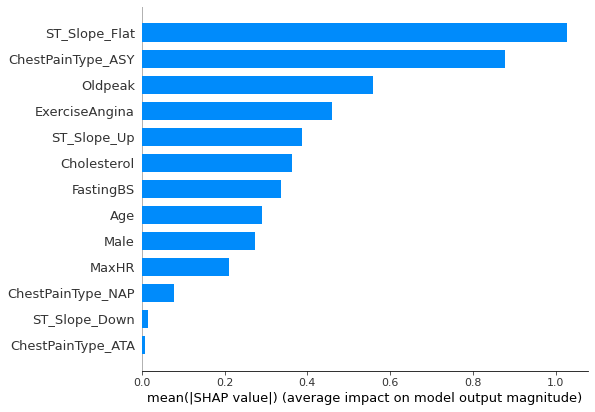

In [53]:
#파라미터로 plot_type을 정해주면 각 특성이 모델에 미치는 절대 영향도(=기여분)를 눈으로 파악
shap.summary_plot(shap_values, X_train_over, plot_type='bar')

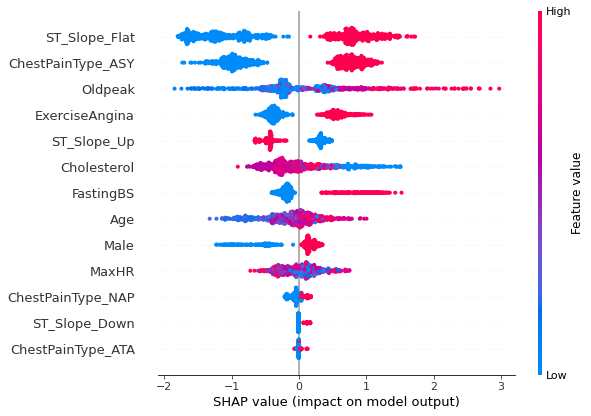

In [54]:
#전체 특성들이 Shapley value 분포에 어떤 영향을 미치는지 시각화
#y축은 각 특성
#x축은 Shapely value
#색깔은 특성값을 나타내어 빨간색으로 갈수록 높은 값
#특성은 예측에 미치는 영향력(=중요도)에 따라 정렬

shap.summary_plot(shap_values, X_train_over)

In [55]:
#전체 데이터에 Shapley value를 누적하여 시각화
shap.force_plot(explainer.expected_value, shap_values, X_train_over)

### 전체 데이터 해석 : 전체 데이터 해석 시에는 각 열에 대한 Shapley Value를 누적하여 시각화 합니다.
### 특정 데이터 Force plot을 90도 회전해서 쌓는다고 생각하시면 됩니다.

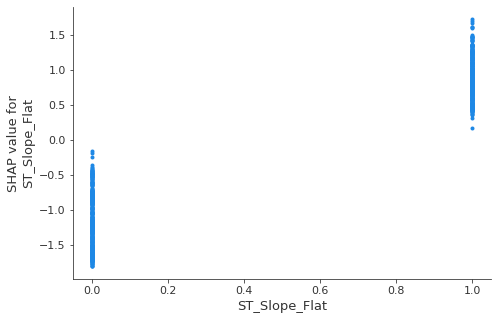

In [56]:
shap.dependence_plot("ST_Slope_Flat",shap_values,X_train_over,interaction_index = None)

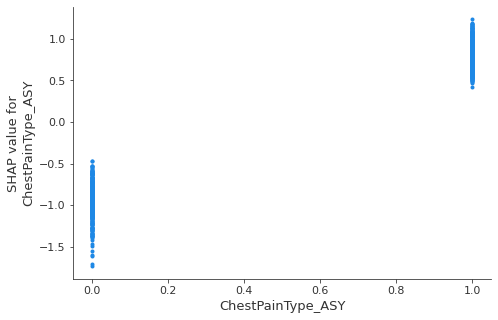

In [57]:
shap.dependence_plot("ChestPainType_ASY",shap_values,X_train_over,interaction_index = None)

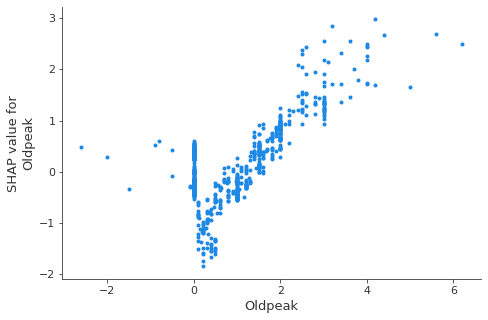

In [58]:
shap.dependence_plot("Oldpeak",shap_values,X_train_over,interaction_index = None)

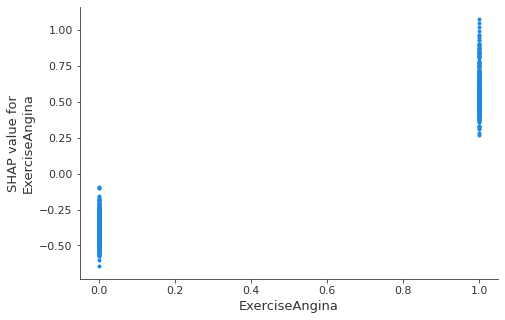

In [59]:
shap.dependence_plot("ExerciseAngina",shap_values,X_train_over,interaction_index = None)

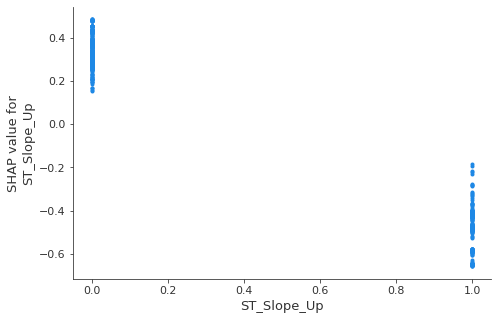

In [60]:
shap.dependence_plot("ST_Slope_Up",shap_values,X_train_over,interaction_index = None)